In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [95]:
columns = ["age", "workclass", "fnlwgt", "education", "education_num", 
           "marital_status", "occupation", "relationship", "race", "gender", 
           "capital_gain", "capital_loss", "hours_per_week", "native_country", "income_bracket"]
df = pd.read_csv('adult-training.csv',names=columns,skipinitialspace=True)

In [96]:
test = pd.read_csv('adult-test.csv',names=columns,skiprows=1,skipinitialspace=True)

In [97]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [98]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
gender            32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income_bracket    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Looks like no missing data! But in the problem statement it was told that this data contains missing values. Lets explore the data!

In [100]:
#Removing all null values row
categorical_columns=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'native_country']
for category in categorical_columns:
    print(test[category].value_counts())

Private             11210
Self-emp-not-inc     1321
Local-gov            1043
?                     963
State-gov             683
Self-emp-inc          579
Federal-gov           472
Without-pay             7
Never-worked            3
Name: workclass, dtype: int64
HS-grad         5283
Some-college    3587
Bachelors       2670
Masters          934
Assoc-voc        679
11th             637
Assoc-acdm       534
10th             456
7th-8th          309
Prof-school      258
9th              242
12th             224
Doctorate        181
5th-6th          176
1st-4th           79
Preschool         32
Name: education, dtype: int64
Married-civ-spouse       7403
Never-married            5434
Divorced                 2190
Widowed                   525
Separated                 505
Married-spouse-absent     210
Married-AF-spouse          14
Name: marital_status, dtype: int64
Prof-specialty       2032
Exec-managerial      2020
Craft-repair         2013
Sales                1854
Adm-clerical         

### Looks like missing values are encoded by '?' in the data. Lets replace them by nan

In [101]:
df.replace('?',np.nan,inplace=True)
test.replace('?',np.nan,inplace=True)

In [102]:
df.isnull().sum()
test.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
gender              0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income_bracket      0
dtype: int64

Workclass, occupation and native country have missing values.
* Workclass: This could be because someone was working earlier and not working now. We don't have a category for that. We can create that.
* Occupation: Replace '?' with 'unknown occupation'
* Native Country: Lets replace Native country as unknown.

In [103]:
df['workclass'].fillna('Not working now', inplace=True)
df['occupation'].fillna('Unknown',inplace=True)
df['native_country'].fillna('Unknown',inplace=True)

test['workclass'].fillna('Not working now', inplace=True)
test['occupation'].fillna('Unknown',inplace=True)
test['native_country'].fillna('Unknown',inplace=True)

In [104]:
test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64

Cool, so missing values have been handled!

In [105]:
df['income_bracket'] = df['income_bracket'].apply(lambda x: 1 if x=='>50K' else 0)
test['income_bracket'] = test['income_bracket'].apply(lambda x: 1 if x=='>50K' else 0)

In [106]:
print([column for column in df.columns if column not in categorical_columns])

['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'income_bracket']


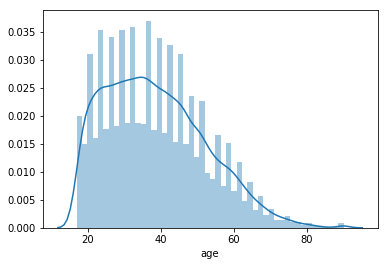

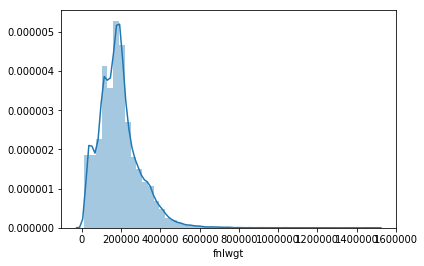

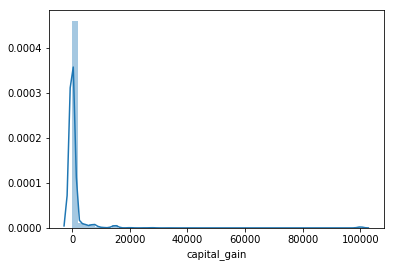

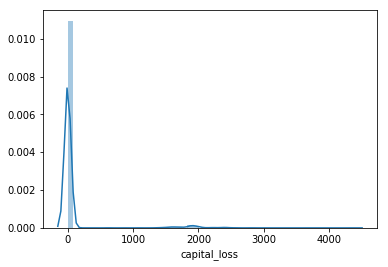

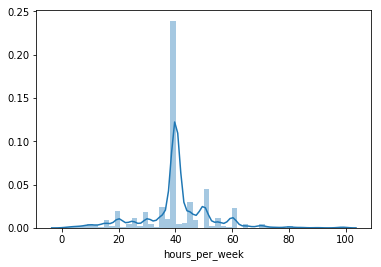

In [107]:
numerical_features=['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']
for feature in numerical_features:
    sns.distplot(df[feature])
    plt.show()

What should be the action step for the above skewed variables:
* Age,capital_gain,capital_loss: Apply standard scaling
* fnlwgt: Apply log cause the values are skewed. 
* Education_num: This should be correlated with Education feature. Lets eliminate one of them.

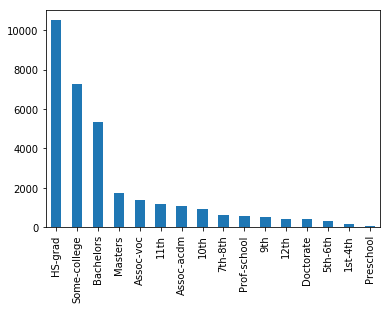

In [108]:
df['education'].value_counts().plot(kind='bar');

Merging the primary education to reduce the number of categories

In [109]:
def primary(x):
    if x in ['1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th']:
        return ' Primary'
    else:
        return x

In [110]:
df['education'] = df['education'].apply(primary)
df['education'].unique()

test['education'] = test['education'].apply(primary)
test['education'].unique()

array([' Primary', 'HS-grad', 'Assoc-acdm', 'Some-college', 'Prof-school',
       'Bachelors', 'Masters', 'Doctorate', 'Assoc-voc', 'Preschool'],
      dtype=object)

In [111]:
df['fnlwgt'] = df['fnlwgt'].apply(lambda x: np.log1p(x))
test['fnlwgt'] = test['fnlwgt'].apply(lambda x: np.log1p(x))

In [112]:
df.drop('education_num',axis=1,inplace=True)
test.drop('education_num',axis=1,inplace=True)

In [86]:
def preprocess(df):
    df.replace('?',np.nan,inplace=True)
    df['workclass'].fillna('Not working now', inplace=True)
    df['occupation'].fillna('Unknown',inplace=True)
    df['native_country'].fillna('Unknown',inplace=True)
    df['income_bracket'] = df['income_bracket'].apply(lambda x: 1 if x=='>50K' else 0)
    df['education'] = df['education'].apply(primary)
    df['fnlwgt'] = df['fnlwgt'].apply(lambda x: np.log1p(x))
    df['native_country']=df['native_country'].apply(lambda country: native(country))
    return df

In [93]:
df_preprocessed=preprocess(df)
test_preprocessed=preprocess(test)
categories = np.union1d(df_preprocessed[categorical_columns], test_preprocessed[categorical_columns])
df_preprocessed = df_preprocessed[categorical_columns].astype('category', categories=categories)
test_preprocessed = test_preprocessed[categorical_columns].astype('category', categories=categories)
dum_train=pd.get_dummies(df_preprocessed)
dum_test=pd.get_dummies(test_preprocessed)
dum_train.shape,dum_test.shape

((32561, 22102), (16281, 13220))

In [92]:
dum_train.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Not working now,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_ Primary,...,race_Black,race_Other,race_White,gender_Female,gender_Male,native_country_Central America,native_country_Eastern,native_country_European,native_country_North America,native_country_South America
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0


In [113]:
df.shape,test.shape

((32561, 14), (16281, 14))

In [114]:
df_full=pd.concat([df,test],axis=0)

In [115]:
df_full.native_country.value_counts()


United-States                 43832
Mexico                          951
Unknown                         857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [116]:
df_full.native_country.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Unknown', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [117]:
def native(country):
    if country in ['United-States',  'Unknown','Canada','Columbia']:
        return 'North America'
    elif country in ['Cuba','Mexico','Dominican-Republic','Puerto-Rico','Outlying-US(Guam-USVI-etc)','Jamaica','Haiti'
                     ,'Honduras','El-Salvador','Guatemala','Nicaragua']:
        return 'Central America'
    elif country in ['South','Ecuador','Peru','Trinadad&Tobago']:
        return 'South America'
    elif country in ['England', 'Germany','Italy','Portugal','France', 'Yugoslavia','Scotland','Greece', 
                     'Ireland',' Philippines','Hungary','Holand-Netherlands','Ireland','Poland']:
        return 'European'
    elif country in ['India', 'Iran', 'Philippines','Cambodia','Thailand', 'Laos', 'Taiwan', 'Japan', 'China', 'Vietnam',
                     'Hong']:
        return 'Eastern'    
    else: 
        return country 

In [118]:
df_full['native_country']=df_full['native_country'].apply(lambda country: native(country))
df_full['native_country'].unique()

array(['North America', 'Central America', 'Eastern', 'South America',
       'European'], dtype=object)

In [119]:
df_full=pd.get_dummies(df_full)

In [130]:
def normalize(data):
    '''
    data: dataframe which you want to normalize
    '''
    fmean=np.mean(data)
    frange=np.amax(data)-np.amin(data)
    normalization_params = [fmean,frange]
    data-=fmean
    data/=frange
    return data,normalization_params

In [131]:
train=df_full.head(df.shape[0])
test_cat=df_full.tail(test.shape[0])

X_train = train.drop('income_bracket', axis=1)
y_train = train['income_bracket']
X_test = test_cat.drop('income_bracket',axis=1)
y_test = test_cat['income_bracket']

In [132]:
X_train,normalization_params=normalize(X_train)
X_test-=normalization_params[0]
X_test/=normalization_params[1]


In [133]:
normalization_params

[age                                       38.581647
 fnlwgt                                    11.983778
 capital_gain                            1077.648844
 capital_loss                              87.303830
 hours_per_week                            40.437456
 workclass_Federal-gov                      0.029483
 workclass_Local-gov                        0.064279
 workclass_Never-worked                     0.000215
 workclass_Not working now                  0.056386
 workclass_Private                          0.697030
 workclass_Self-emp-inc                     0.034274
 workclass_Self-emp-not-inc                 0.078038
 workclass_State-gov                        0.039864
 workclass_Without-pay                      0.000430
 education_ Primary                         0.129050
 education_Assoc-acdm                       0.032769
 education_Assoc-voc                        0.042443
 education_Bachelors                        0.164461
 education_Doctorate                        0.

In [134]:
X_train.head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Not working now,workclass_Private,...,race_Black,race_Other,race_White,gender_Female,gender_Male,native_country_Central America,native_country_Eastern,native_country_European,native_country_North America,native_country_South America
0,0.005731,-0.151324,0.010964,-0.020042,-0.004464,-0.029483,-0.064279,-0.000215,-0.056386,-0.69703,...,-0.095943,-0.008323,0.145726,-0.330795,0.330795,-0.039249,-0.020607,-0.016001,0.08071,-0.004852
1,0.156416,-0.136287,-0.010777,-0.020042,-0.279974,-0.029483,-0.064279,-0.000215,-0.056386,-0.69703,...,-0.095943,-0.008323,0.145726,-0.330795,0.330795,-0.039249,-0.020607,-0.016001,0.08071,-0.004852
2,-0.007968,0.062075,-0.010777,-0.020042,-0.004464,-0.029483,-0.064279,-0.000215,-0.056386,0.30297,...,-0.095943,-0.008323,0.145726,-0.330795,0.330795,-0.039249,-0.020607,-0.016001,0.08071,-0.004852
3,0.197512,0.079754,-0.010777,-0.020042,-0.004464,-0.029483,-0.064279,-0.000215,-0.056386,0.30297,...,0.904057,-0.008323,-0.854274,-0.330795,0.330795,-0.039249,-0.020607,-0.016001,0.08071,-0.004852
4,-0.144954,0.156061,-0.010777,-0.020042,-0.004464,-0.029483,-0.064279,-0.000215,-0.056386,0.30297,...,0.904057,-0.008323,-0.854274,0.669205,-0.669205,0.960751,-0.020607,-0.016001,-0.91929,-0.004852


In [135]:
X_test.head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Not working now,workclass_Private,...,race_Black,race_Other,race_White,gender_Female,gender_Male,native_country_Central America,native_country_Eastern,native_country_European,native_country_North America,native_country_South America
0,-0.186050,0.072595,-0.010777,-0.020042,-0.004464,-0.029483,-0.064279,-0.000215,-0.056386,0.30297,...,0.904057,-0.008323,-0.854274,-0.330795,0.330795,-0.039249,-0.020607,-0.016001,0.08071,-0.004852
1,-0.007968,-0.120611,-0.010777,-0.020042,0.097577,-0.029483,-0.064279,-0.000215,-0.056386,0.30297,...,-0.095943,-0.008323,0.145726,-0.330795,0.330795,-0.039249,-0.020607,-0.016001,0.08071,-0.004852
2,-0.144954,0.155160,-0.010777,-0.020042,-0.004464,-0.029483,0.935721,-0.000215,-0.056386,-0.69703,...,-0.095943,-0.008323,0.145726,-0.330795,0.330795,-0.039249,-0.020607,-0.016001,0.08071,-0.004852
3,0.074224,0.000245,0.066104,-0.020042,-0.004464,-0.029483,-0.064279,-0.000215,-0.056386,0.30297,...,0.904057,-0.008323,-0.854274,-0.330795,0.330795,-0.039249,-0.020607,-0.016001,0.08071,-0.004852
4,-0.281940,-0.091035,-0.010777,-0.020042,-0.106505,-0.029483,-0.064279,-0.000215,0.943614,-0.69703,...,-0.095943,-0.008323,0.145726,0.669205,-0.669205,-0.039249,-0.020607,-0.016001,0.08071,-0.004852


In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)



c:\users\vjaju\appdata\local\continuum\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [138]:
y_train_pred = model.predict(X_train)
y_test_pred=model.predict(X_test)
accuracy_score(y_train_pred, y_train)

0.8515401861122202

In [139]:
y_train_pred = model.predict(X_train)
y_test_pred=model.predict(X_test)
accuracy_score(y_test_pred, y_test)

0.8091026349732817

In [ ]:
def train_with_file(data_file, iters):
  """Trains a logisitc regression classifier.

  Args:
    data_file: a path to a csv file containing training data, without headers.
    iters: the number of iterations to use when training the classifier

  Returns:
    weights: a column vector (1d numpy array) containing the weights learned in your classifier.
    normalization_params: a dict mapping column names to (min, max) values from the training set
  """

  return weights, normalization_params
 
 
def classify(data_file, weights, normalization_params):
  """Classifies data based on the supplied logistic regression weights.

  Args:
    data_file: a path to a csv file containing test data, without headers.
    weights: a column vectors containing the weights learned during training.
    normalization_params: a dict mapping column names to (min, max) values from the training set

  Returns:
    a column vector containing either a 1 or a 0 for each row in data_file
  """

  return labels

# Our grading program will use these functions as follows:
def sample_main():
  weights, normalization_params = train_with_file('adult-training.csv', 1000)
  labels = classify('adult-test.csv', weights, normalization_params)

In [74]:
    fmean=np.mean(X_train)
    frange=np.amax(X_train)-np.amin(X_train)
    normalization_params = [fmean,frange]
    normalization_params[1]

age                                     1.0
fnlwgt                                  1.0
capital_gain                            1.0
capital_loss                            1.0
hours_per_week                          1.0
workclass_Federal-gov                   1.0
workclass_Local-gov                     1.0
workclass_Never-worked                  1.0
workclass_Not working now               1.0
workclass_Private                       1.0
workclass_Self-emp-inc                  1.0
workclass_Self-emp-not-inc              1.0
workclass_State-gov                     1.0
workclass_Without-pay                   1.0
education_ Primary                      1.0
education_Assoc-acdm                    1.0
education_Assoc-voc                     1.0
education_Bachelors                     1.0
education_Doctorate                     1.0
education_HS-grad                       1.0
education_Masters                       1.0
education_Preschool                     1.0
education_Prof-school           

In [ ]:
df['class'].value_counts()

In [ ]:
df['class'].replace(["Iris-setossa","versicolor"], ["Iris-setosa","Iris-versicolor"], inplace=True)
df['class'].value_counts()

In [ ]:
final_df = df[df['class'] != 'Iris-virginica']

In [ ]:
final_df.head()

In [ ]:
sns.pairplot(final_df, hue='class', size=2.5)


In [ ]:
final_df.hist(column = 'sepal_length_cm',bins=20, figsize=(10,5))

In [ ]:
final_df.loc[final_df.sepal_length_cm < 1, ['sepal_length_cm']] = final_df['sepal_length_cm']*100
final_df.hist(column = 'sepal_length_cm',bins=20, figsize=(10,5))

In [ ]:
final_df = final_df.drop(final_df[(final_df['class'] == "Iris-setosa") & (final_df['sepal_width_cm'] < 2.5)].index)
sns.pairplot(final_df, hue='class', size=2.5)

In [ ]:
final_df['class'].replace(["Iris-setosa","Iris-versicolor"], [1,0], inplace=True)
final_df.head()

In [ ]:
inp_df = final_df.drop(final_df.columns[[4]], axis=1)
out_df = final_df.drop(final_df.columns[[0,1,2,3]], axis=1)
#
scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)
#
X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.2, random_state=42)

In [75]:

X_tr_arr = X_train
X_ts_arr = X_test
y_tr_arr = y_train.as_matrix()
y_ts_arr = y_test.as_matrix()

c:\users\vjaju\appdata\local\continuum\miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
c:\users\vjaju\appdata\local\continuum\miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [76]:
print('Input Shape', (X_tr_arr.shape))
print('Output Shape', X_test.shape)

Input Shape (32561, 64)
Output Shape (16281, 64)


In [77]:

def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result


def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost

def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs


def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [78]:
#Get number of features
n_features = X_tr_arr.shape[1]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)
#Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.0001,no_iterations=4500)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)
#
m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]
#
y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))
#
y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_ts_arr))

Number of Features 64
Optimized weights [[ 8.13417050e-03 -2.06817472e-05  3.14045332e-03  2.64273303e-03
   5.42114237e-03  1.90764588e-03  1.51329850e-03 -2.26636751e-05
  -3.39254294e-03 -6.64179711e-03  4.76475869e-03  1.37808145e-03
   5.39767144e-04 -4.65479478e-05 -1.04807964e-02  1.14089753e-04
   3.71103469e-04  1.26141790e-02  2.81802974e-03 -1.16292135e-02
   7.41108780e-03 -1.68309224e-04  3.87308862e-03 -4.92325925e-03
  -8.02173323e-03  6.21973089e-05  4.08415432e-02 -8.92403627e-04
  -2.75341846e-02 -2.41457985e-03 -2.04083921e-03 -5.25551585e-03
  -1.60168328e-05 -9.75814142e-04  1.34023945e-02 -1.75376805e-03
  -3.32529974e-03 -3.18888558e-03 -8.77843304e-03 -4.63660722e-04
   1.17305761e-02  7.27013243e-04  1.44060326e-03  8.26402781e-04
  -9.54389345e-04 -3.41520661e-03  3.60993908e-02 -1.50301783e-02
  -2.67471711e-03 -1.53407990e-02 -8.11374204e-03  5.06004570e-03
  -5.27246066e-04  3.55542214e-04 -4.83228709e-03 -5.45454898e-04
   5.54944584e-03 -1.83875695e-02  1

In [79]:
print(coeff)

{'w': array([[ 8.13417050e-03, -2.06817472e-05,  3.14045332e-03,
         2.64273303e-03,  5.42114237e-03,  1.90764588e-03,
         1.51329850e-03, -2.26636751e-05, -3.39254294e-03,
        -6.64179711e-03,  4.76475869e-03,  1.37808145e-03,
         5.39767144e-04, -4.65479478e-05, -1.04807964e-02,
         1.14089753e-04,  3.71103469e-04,  1.26141790e-02,
         2.81802974e-03, -1.16292135e-02,  7.41108780e-03,
        -1.68309224e-04,  3.87308862e-03, -4.92325925e-03,
        -8.02173323e-03,  6.21973089e-05,  4.08415432e-02,
        -8.92403627e-04, -2.75341846e-02, -2.41457985e-03,
        -2.04083921e-03, -5.25551585e-03, -1.60168328e-05,
        -9.75814142e-04,  1.34023945e-02, -1.75376805e-03,
        -3.32529974e-03, -3.18888558e-03, -8.77843304e-03,
        -4.63660722e-04,  1.17305761e-02,  7.27013243e-04,
         1.44060326e-03,  8.26402781e-04, -9.54389345e-04,
        -3.41520661e-03,  3.60993908e-02, -1.50301783e-02,
        -2.67471711e-03, -1.53407990e-02, -8.11374

In [ ]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

In [85]:
categories = np.union1d(df[categorical_columns], test[categorical_columns])
categories


array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       '?', 'Adm-clerical', 'Amer-Indian-Eskimo', 'Armed-Forces',
       'Asian-Pac-Islander', 'Assoc-acdm', 'Assoc-voc', 'Bachelors',
       'Black', 'Cambodia', 'Canada', 'China', 'Columbia', 'Craft-repair',
       'Cuba', 'Divorced', 'Doctorate', 'Dominican-Republic', 'Ecuador',
       'El-Salvador', 'England', 'Exec-managerial', 'Farming-fishing',
       'Federal-gov', 'Female', 'France', 'Germany', 'Greece',
       'Guatemala', 'HS-grad', 'Haiti', 'Handlers-cleaners',
       'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'Husband',
       'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos',
       'Local-gov', 'Machine-op-inspct', 'Male', 'Married-AF-spouse',
       'Married-civ-spouse', 'Married-spouse-absent', 'Masters', 'Mexico',
       'Never-married', 'Never-worked', 'Nicaragua', 'Not-in-family',
       'Other', 'Other-relative', 'Other-service',
       'Outlying-US(Guam-USVI-etc)', 'Own-